In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load
from scipy.stats import randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

## Exploring emails_phising.csv

In [ ]:
df = pd.read_csv('../dataset/emails_phising.csv')

df.head(10)

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1
5,Caroline Aragon <dwthaidomainnamesm@thaidomain...,user7-ext5@gvc.ceas-challenge.cc,"Wed, 06 Aug 2008 05:31:22 +0600",From Caroline Aragon,\n\n\n\n\nYo wu urS mo ou go rc ebo eForM rgi ...,1,0
6,Replica Watches <jhorton@thebakercompanies.com>,user2.10@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 21:44:01 +0000",Replica Watches,We have fake Swiss Men's and Ladie's Replica \...,1,0
7,Daily Top 10 <acidirev_1972@tcwpg.com>,user2.3@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:41:14 -0300",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
8,qydlqcws-iacfym@issues.apache.org,xrh@spamassassin.apache.org,"Tue, 05 Aug 2008 15:31:03 -0800",[Bug 5780] URI processing turns uuencoded stri...,http://issues.apache.org/SpamAssassin/show_bug...,0,1
9,Daily Top 10 <orn|dent_1973@musicaedischi.it>,user7@gvc.ceas-challenge.cc,"Wed, 06 Aug 2008 00:31:38 +0100",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1


In [13]:
df.isna().sum()

sender        0
receiver    462
date          0
subject      28
body          0
label         0
urls          0
dtype: int64

In [7]:
df['label'].unique()

array([1, 0], dtype=int64)

In [9]:
df[df['label'] == 1].count() / df.shape[0]

sender      0.557848
receiver    0.557772
date        0.557848
subject     0.557516
body        0.557848
label       0.557848
urls        0.557848
dtype: float64

In [14]:
df = df.dropna()

In [15]:
df = df.iloc[:, 4:6]

In [16]:
df['body'] = df['body'].str.replace(r'[\r\n]+', ' ', regex=True)

In [17]:
df.head(10)

,body,label
0,"Buck up, your troubles caused by small dimensi...",1
1,Upgrade your sex and pleasures with these tec...,1
2,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1
3,Would anyone object to removing .so from this ...,0
4,WelcomeFastShippingCustomerSupport http://7iw...,1
5,Yo wu urS mo ou go rc ebo eForM rgi oreWo iyv...,1
6,We have fake Swiss Men's and Ladie's Replica ...,1
7,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1
8,http://issues.apache.org/SpamAssassin/show_bug...,0
9,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1


## Building Machine Learning Model

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df['body'], df['label'], test_size=0.25, random_state=42)

In [28]:
tf_idf = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_tfidf = tf_idf.fit_transform(X_train)
X_test_tfidf = tf_idf.transform(X_test)

In [20]:
param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': randint(3, 6),  # Random integer between 3 and 5
    'shrinking': [True, False],
    'tol': [1e-3, 1e-4],
}

In [21]:
svc = SVC()

random_search = RandomizedSearchCV(svc, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1)
random_search.fit(X_train_tfidf, y_train)

print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'C': 10, 'degree': 5, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': False, 'tol': 0.0001}


In [29]:
svm_model = SVC(C=10, degree=5, gamma='scale', kernel='rbf', shrinking=False, tol=0.0001)
svm_model.fit(X_train_tfidf, y_train)

SVC(C=10, degree=5, shrinking=False, tol=0.0001)

In [30]:
y_pred = svm_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4245
           1       0.99      1.00      0.99      5423

    accuracy                           0.99      9668
   macro avg       0.99      0.99      0.99      9668
weighted avg       0.99      0.99      0.99      9668



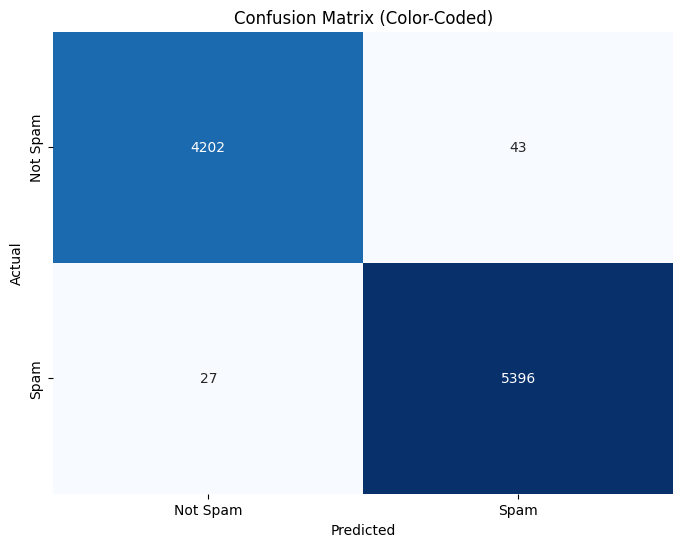

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Phishing', 'Phishing'], yticklabels=['Not Phishing', 'Phishing'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Color-Coded)')
plt.show()